# Challenge Data : classification linéaire des images de 1 et de 6

## Expérimentation en Python - Séance 1

On commence par importer les données dont nous aurons besoin :

In [1]:
# Importation des données 
from utilitaires_chargement_ import *

## I. Rappel sur les images numériques en Python

Affichons une image `x` de taille $28 \times 28$ que nous avons importée, grâce à la fonction `affichage`

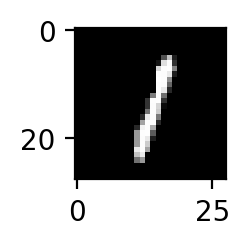

In [2]:
# Dans cette cellule, afficher l'image x
affichage(x)

* Pour accèder à la valeur d'un pixel $(i,j)$ de $x$ :  `x[i,j]`.
* Afficher une valeur :  fonction `print()`

In [ ]:
# Dans cette cellule, afficher le pixel (14, 14) de l'image x


<br><br>

***
***

<br><br>

## II. Challenge : classer les chiffres 1 et 6

La base de données MNIST-2 contient des images de 1 et de 6 de taille $28 \times 28$. 

* `x_train` : liste d'images d'entraînement.
* `x_test` : liste d'images de test. 

* `y_train` : liste des chiffres $y \in \{1, 6\}$ associés aux images de `x_train`.

### II.1 Visualisation d'images d'entraînement 

* `x_train_par_population[0]` est une liste contenant toutes les images de 1.
* `x_train_par_population[1]` est une liste contenant toutes les images de 6.

In [ ]:
# Dans cette cellule, afficher la deuxième image au sein de la population de chiffres 6
affichage(x_train_par_population[1][1])

Exécutez la cellule ci-dessous afin d'afficher les dix premières images au sein de chaque population.

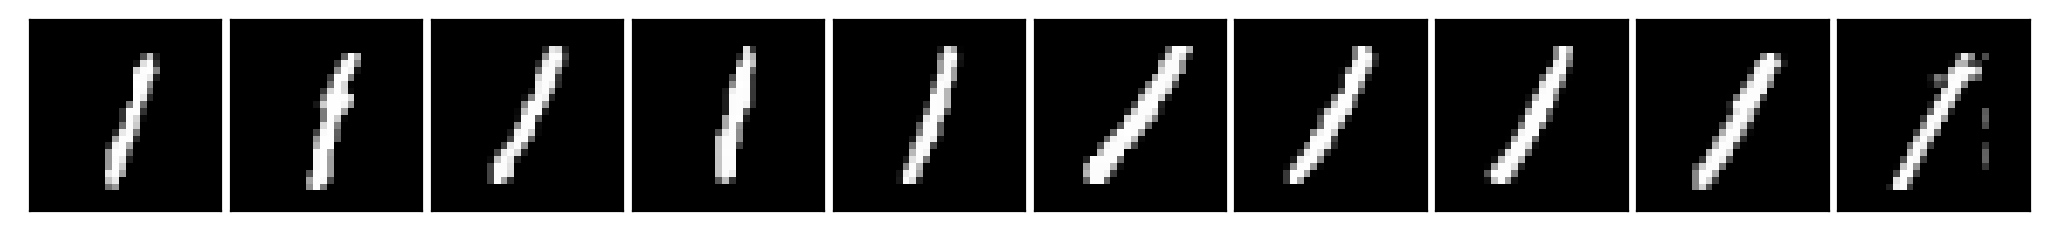

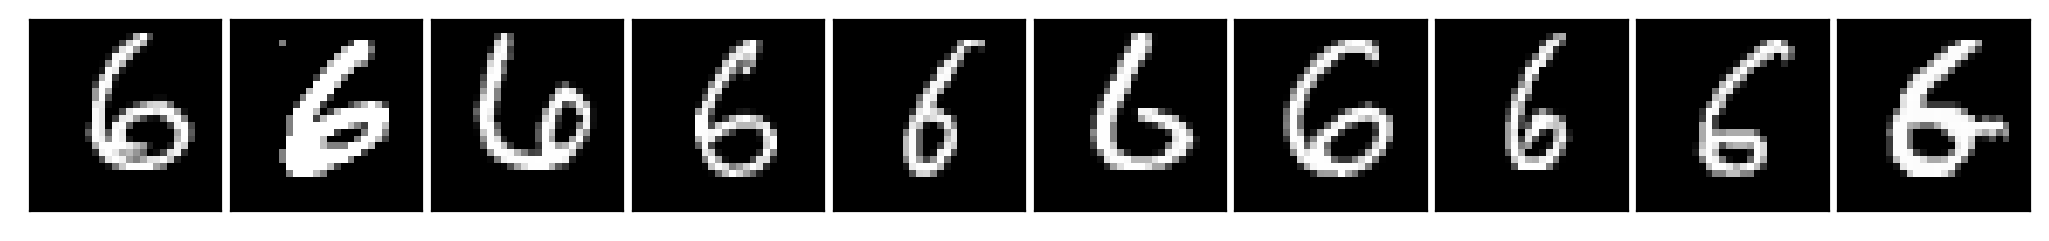

In [3]:
# Affichage des dix premières images de 1
affichage_dix(x_train_par_population[0])

# Affichage des dix premières images de 6
affichage_dix(x_train_par_population[1])

<br><br>

***
***

<br><br>

### II.2 Utiliser deux caractéristiques discriminantes au lieu d'une seule

**Benchmark :** Proposition de deux caractéristiques utilisées comme référence 

In [4]:
def deux_caracteristiques(x):
    # coupe horizontale
    return np.mean(x[0:14,:]), np.mean(x[14:,:])

### Visualisation dans le plan des caractéristiques des différentes populations

On calcule ces deux caractéristiques sur toutes les images de `x_train_4`, et on stocke les résultats dans une liste `c_train`. 

Exécutez la cellule suivante qui calcule la liste `c_train`.

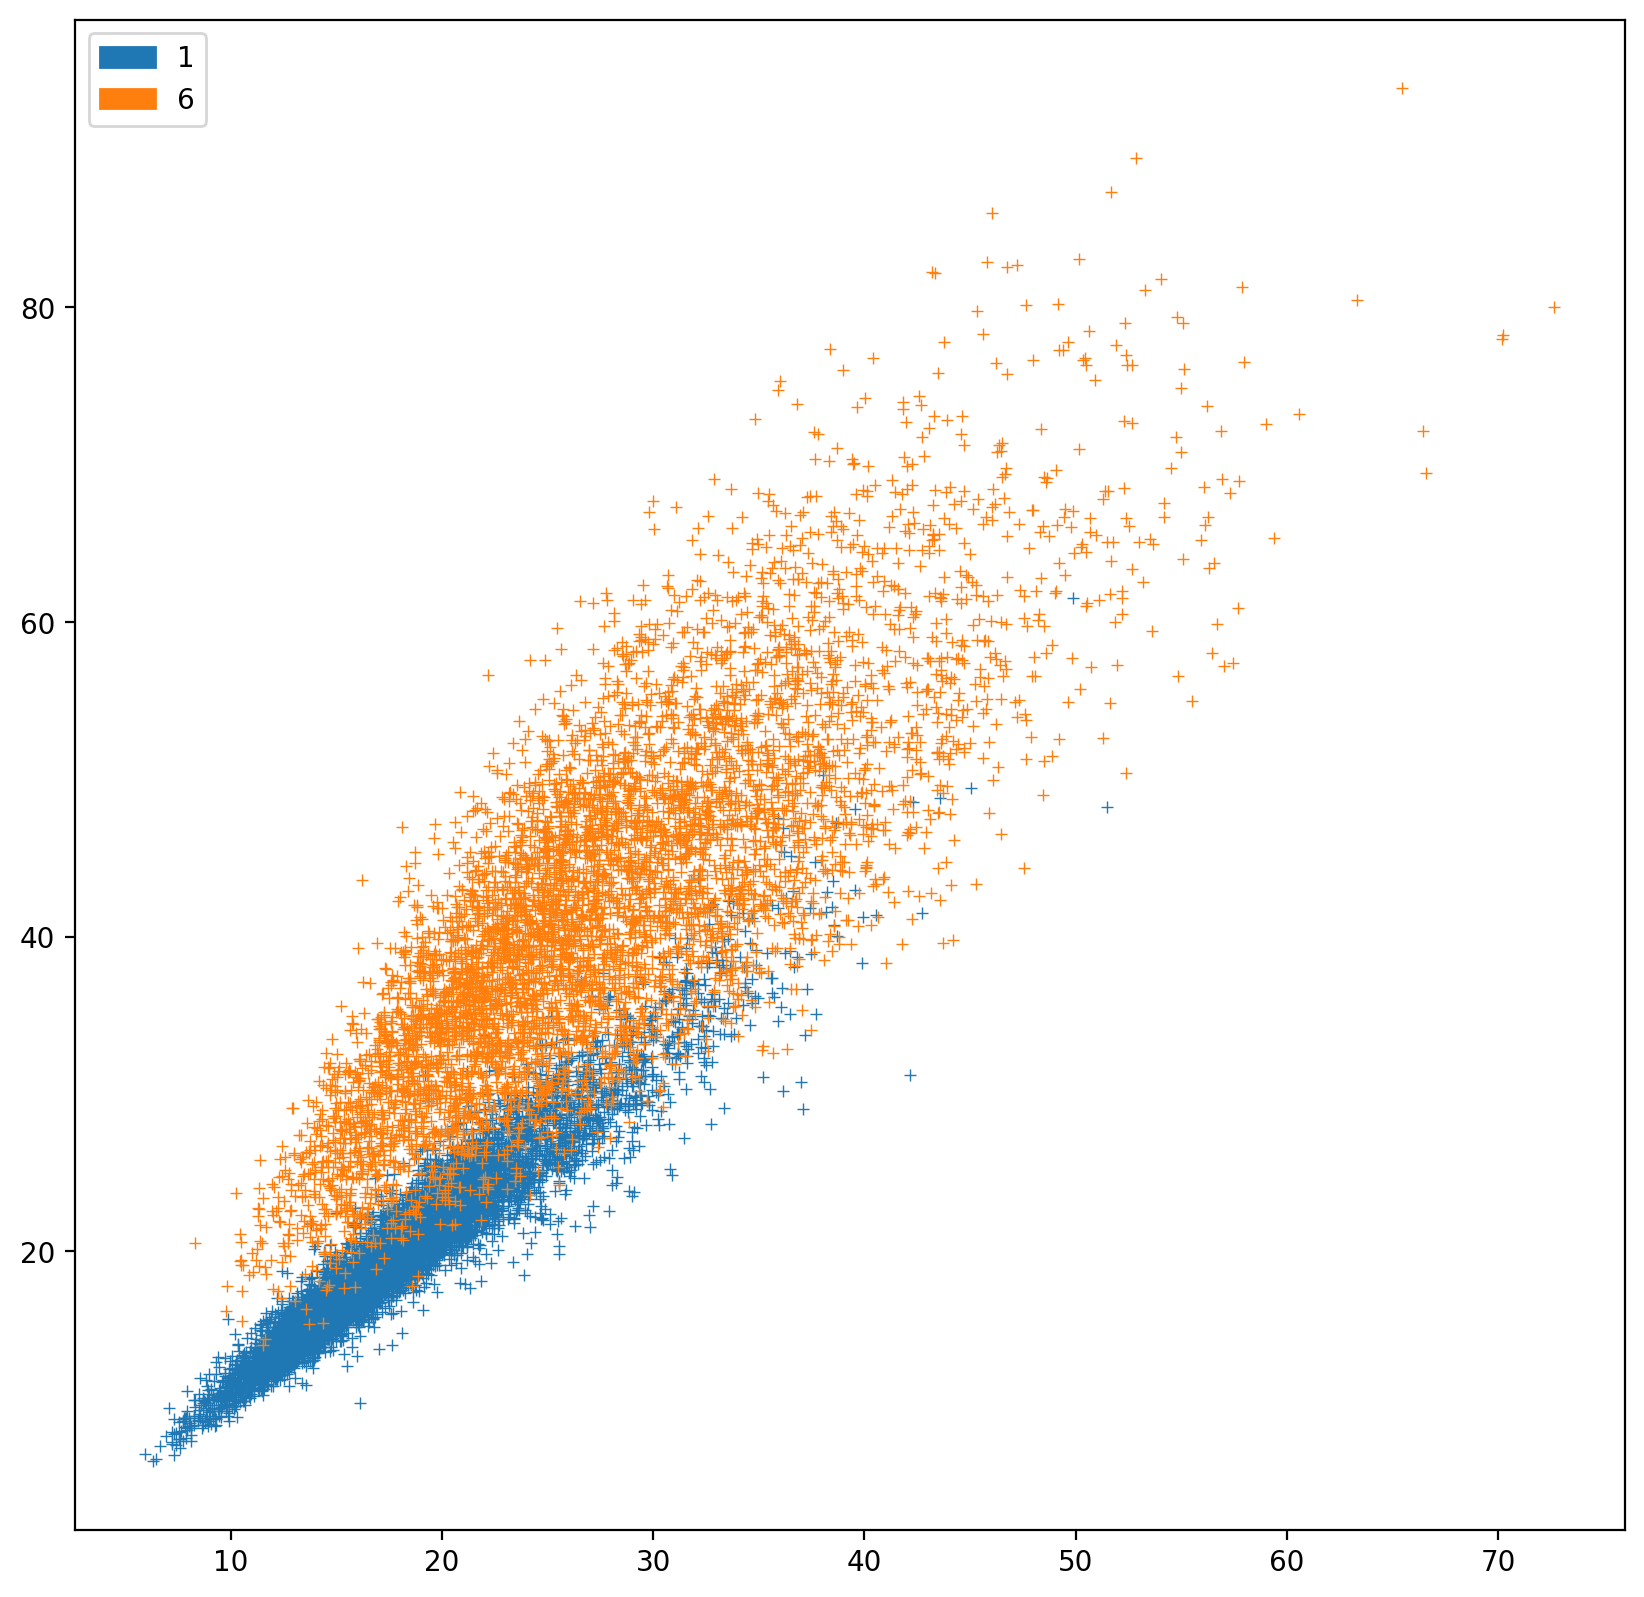

In [5]:
# On commence par définir et initialiser la liste c_train (vide au début)
c_train = []

# On la remplit à l'aide d'une boucle for :
for x in x_train:
    c_train.append(deux_caracteristiques(x))

visualiser_scatter_2d_mnist_2(c_train)

### II. 3. Classificateur linéaire

<b><font color=red> Proposer deux valeurs pour les paramètre $m$ et $p$ de l'équation de la droite.</font></b>

On rappelle que l'équation est $x_2 = m x_1 +p $

In [ ]:
m = ...
p = ...

tracer_separatrice(m, p)

### Erreur sur l'ensemble d'entraînement

In [ ]:
def classificateur(m, p, x_1, x_2):
    s = np.sign(m*x_1 - x_2 +p)
    if s > 0:
        return ...
    else :
        return ...

In [ ]:
score = erreur_lineaire(m,p)
print("Score =", f"{100*score:.2f}%")

<br><br>

***
***

<br><br>

### Erreur sur l'ensemble de test

On applique maintenant l'algorithme de classification précédent aux images de test `x_test_4`. On commence comme pour les images d'entraînement par calculer leurs caractéristiques et les stocker dans une liste `c_test`. 

<b><font color=red> Exécutez la cellule suivante :  </font></b> 

In [ ]:
# On commence par définir et initialiser la liste c_test (vide au début)
c_test = []

# On la remplit à l'aide d'une boucle for :
for x in x_test_4:
    c_test.append(deux_caracteristiques(x))
    
y_est_test = []

# On remplit y_est_test à l'aide de notre algorithme de classification :
for c in c_test:
    y_est_test.append(classificateur(m,p, c[0], c[1]))

# Sauve et télécharge les estimations `y_est_test` : 
sauver_et_telecharger_mnist_4(y_est_test, 'y_est_test.csv')

<b><font color=red>Soumettez ce fichier .csv sur la plateforme Challenge Data</font></b> afin d'obtenir votre erreur de test en cliquant sur **[ce lien](https://challengedata.ens.fr/challenges/117)** (n'oubliez pas au préalable d'être bien connecté).

Quelle est votre erreur de test ?